# 1. Understanding Business Requirement & Data Collection

### Abnormal Return Occured during Dashboard Generation:
•	New Product Launched at Week 28 <br>
•	Data Used in Dashborad and Future Analysis Collected from Internal Inventory Database and Outside Platform.

In [2]:
# ImportNecessaryLib
import numpy as np
import pandas as pd
from scipy import stats
from IPython import display

# Extract Formatted data
file = pd.read_excel('Real.xlsx')
file

,Unnamed: 0,Sale_Price,Dollar_Share,Unit_Share,Inventory,Returns,Rate_rates,RR Product Defective,RR Other,Actual Defected
0,Week 28,599,130582,218,-218,-19,0.087156,1,18,1
1,Week 29,599,137171,205,-404,-24,0.117073,2,22,2
2,Week 30,599,159933,241,-621,-26,0.107884,5,21,3
3,Week 31,599,143161,208,-803,-31,0.149038,4,27,2
4,Week 32,599,156938,243,-1015,-19,0.078189,2,17,1
5,Week 33,599,221630,343,-1339,-27,0.078717,6,21,1
6,Week 34,699,139800,147,-1459,-53,0.360544,40,13,2
7,Week 35,699,88074,112,-1518,-14,0.125000,3,11,2


# 2. Explotory Data Analysis & Feature Engineering
### The Potential Causes of Abnormal Return:
•	Actual Defective Patches, Promotion withdrawed at week 33, Installation Support Service (Expertises Door-to-Door Service), Delivery Damages..


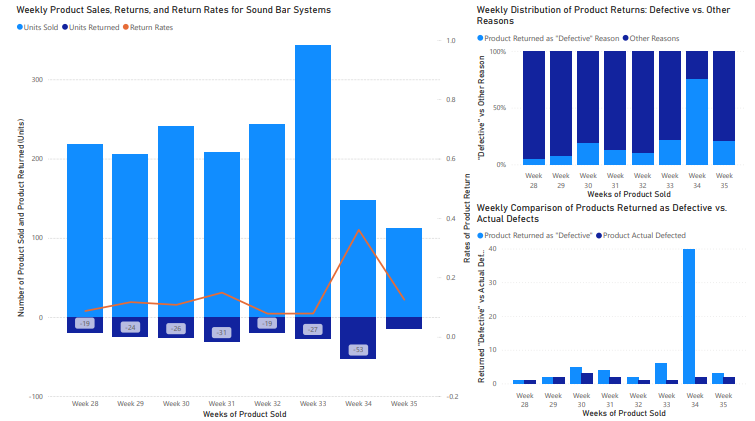

In [4]:
display.Image("PowerBI.png")

### Methods of Validation:
•	Massive Recall (Lost Heavily), Statistical Assumption (Promotion, ISS, Patch)<br>

### Should be Performed When Handling a Subject 
•	Investigated Features Such as Time to Return, Addtional Services...
•	Could Also Perform Charts Such as Correlation Matrices with Enough Attributes.

# 3. Data Analysis
### Identify the Anomaly and Suspected Cause:
•	$Anomaly$: Increased product returns.
<br>
•	$Suspected Cause$: Lack of installation instructions for the sound bar system.

### Formulate Hypotheses:
•	$Null Hypothesis (H0)$: The proportion of returns is the same for sound bar systems with and without installation support service.
<br>
•	$Alternative Hypothesis (H1)$: The proportion of returns is higher for sound bar systems without installation support service.

### Calculate the Proportion of Needs: 

In [5]:
# installation support service = iss

returns_with_iss = file.loc[file['Returns'] > -50, 'Returns'].sum()
total_sales_with_iss = file.loc[file['Returns'] > -50, 'Unit_Share'].sum()
returns_without_iss = file.loc[file['Returns'] < -50, 'Returns'].sum()
total_sales_without_iss = file.loc[file['Returns'] < -50, 'Unit_Share'].sum()

returns_with_iss = -returns_with_iss
returns_without_iss = -returns_without_iss

p1 = returns_with_iss / total_sales_with_iss
p2 = returns_without_iss / total_sales_without_iss

pooled_returns = returns_with_iss + returns_without_iss
pooled_sales = total_sales_with_iss + total_sales_without_iss
p = pooled_returns / pooled_sales

### Calculate the Standard Error:

In [6]:
SE = np.sqrt(p * (1 - p) * (1 / total_sales_with_iss + 1 / total_sales_without_iss))
print(SE)

0.02843282936415818


### Calculate the Test Statistic (z) & P-Value:

In [7]:
z = (p1 - p2) / SE

p_value = stats.norm.sf(abs(z)) * 2

alpha = 0.05
if p_value < alpha:
    decision = "Reject the null hypothesis (H0)."
else:
    decision = "Fail to reject the null hypothesis (H0)."


### Decision:

In [8]:
print(f"Proportion with instructions: {p1:.4f}")
print(f"Proportion without instructions: {p2:.4f}")
print(f"Pooled proportion: {p:.4f}")
print(f"Standard error: {SE:.4f}")
print(f"Z-test statistic: {z:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Decision: {decision}")

Proportion with instructions: 0.1019
Proportion without instructions: 0.3605
Pooled proportion: 0.1241
Standard error: 0.0284
Z-test statistic: -9.0963
P-value: 0.0000
Decision: Reject the null hypothesis (H0).


•	$Decision$: Reject the null hypothesis (H0) which means that lack of installation instructions is likely causing the increased returns.
<br>
•	$Future Implement$: Restore Installation Support Service Until Online Tutorials and Fix the Translation Error in Installation Instructions Coming with Product.